Selen Çiğdem <br>
Didem Kahyaoğlu

In [1]:
import numpy as np
np.random.seed(11)

In [2]:
feature=2 #number of features 
n=20 #number of data

In [3]:
P=  np.random.normal(0,0.01,size=(feature,n))
P

array([[ 1.74945474e-02, -2.86072997e-03, -4.84565132e-03,
        -2.65331856e-02, -8.28462937e-05, -3.19631364e-03,
        -5.36629362e-03,  3.15402668e-03,  4.21050716e-03,
        -1.06560298e-02, -8.86239670e-03, -4.75733493e-03,
         6.89682310e-03,  5.61192176e-03, -1.30554851e-02,
        -1.11947526e-02,  7.36837391e-03,  1.57463407e-02,
        -3.10750885e-04, -6.83446627e-03],
       [ 1.09562970e-02, -3.09576637e-03,  7.25752225e-03,
         1.54907163e-02,  6.30079822e-03,  7.34932370e-04,
         7.32271354e-03, -6.42575392e-03, -1.78093175e-03,
        -5.73954559e-03, -2.04375316e-03, -4.86495100e-03,
        -1.85775324e-03, -3.80536417e-03,  8.89776353e-04,
         6.36716614e-04,  2.96347108e-03,  1.40277112e-02,
        -1.54686257e-02,  1.29561858e-02]])

In [4]:
#determine labels according to given data graph in problem description
y=np.where(P[0]*-0.5>P[1], 1,-1)
y=y[np.newaxis,:]
y.shape

(1, 20)

In [5]:
point_p=np.array([[3],[1]]) #point p is selected randomly by hand with shape of (2,1)
point_p

array([[3],
       [1]])

In [6]:
#concatenate input features with labels
data=np.concatenate((P,y),axis=0)
data

array([[ 1.74945474e-02, -2.86072997e-03, -4.84565132e-03,
        -2.65331856e-02, -8.28462937e-05, -3.19631364e-03,
        -5.36629362e-03,  3.15402668e-03,  4.21050716e-03,
        -1.06560298e-02, -8.86239670e-03, -4.75733493e-03,
         6.89682310e-03,  5.61192176e-03, -1.30554851e-02,
        -1.11947526e-02,  7.36837391e-03,  1.57463407e-02,
        -3.10750885e-04, -6.83446627e-03],
       [ 1.09562970e-02, -3.09576637e-03,  7.25752225e-03,
         1.54907163e-02,  6.30079822e-03,  7.34932370e-04,
         7.32271354e-03, -6.42575392e-03, -1.78093175e-03,
        -5.73954559e-03, -2.04375316e-03, -4.86495100e-03,
        -1.85775324e-03, -3.80536417e-03,  8.89776353e-04,
         6.36716614e-04,  2.96347108e-03,  1.40277112e-02,
        -1.54686257e-02,  1.29561858e-02],
       [-1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
        -1.00000000e+00, -1.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  1.00000000e+00, -1.00000000e+00,
         1.00000000e+00,  1.0

In [12]:
#strength of data is represented by s
s=np.abs(np.random.normal(0.5,0.3,size=(1,n)))


In [13]:
#below solution is shortcut
def function(point_p,P,s,y):
  l2_norm=np.sqrt(np.sum(np.square(point_p-P),axis=0))
  l2_norm_square=np.square(l2_norm) #square and  square root cancels each other, yet we wrote whole formula
  exponential=np.exp(-1*l2_norm_square)
  exponential=exponential[np.newaxis,:]
  a=(y*(s+1)) #elementwise product of y and s
  step2=np.matmul(exponential,a.T)
  print(step2)
  return(np.sign(step2))

In [14]:
#below solution is done directly according to the solution in part 'b'
def function_long_solution(point_p,P,n,s,y):
  step1=np.matmul((point_p-P).T,(point_p-P))
  identity=np.identity(n)
  matrix1=step1*identity
  U=np.ones((n,1)) 
  extracted_diagonal=np.matmul(matrix1,U)
  exponential=np.exp(-1*extracted_diagonal)
  a=(y*(s+1)) #elementwise product of y and s
  step2=np.matmul(exponential.T,a.T)
  print(step2)
  return(np.sign(step2))

In [15]:
label_p=function(point_p,P,s,y) #solution of shortcut
label_p_long= function_long_solution(point_p,P,n,s,y) #solution according to the part 'b'
print("predicted label for given point",point_p.T," is " , label_p) 
print("predicted label for given point",point_p.T," is " , label_p_long) 
print(label_p==label_p_long) #check whether they are same

[[-7.98364753e-05]]
[[-7.98364753e-05]]
predicted label for given point [[3 1]]  is  [[-1.]]
predicted label for given point [[3 1]]  is  [[-1.]]
[[ True]]


Text(0, 0.5, 'p2')

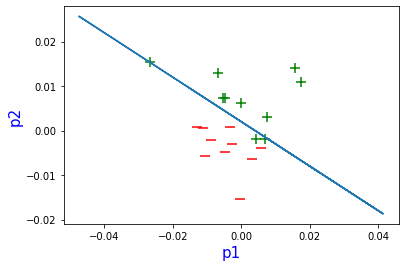

In [16]:
import matplotlib.pyplot as plt
color = ['green' if x<1 else 'red' for x in data[2,:]]
mark=['+' if x<1 else '_' for x in data[2,:]]
x1=np.random.uniform(0.05,-0.05,10)
error=0.002 #we don't want to get 1 accuracy for decision boundary so that we added an error
plt.plot(x1,x1*-0.5+error)
for i in range(len(mark)):
  plt.scatter(data[0][i],data[1][i],c=color[i],marker=mark[i],s=90)
plt.xlabel("p1",fontsize=15,color="b")
plt.ylabel("p2",fontsize=15,color="b")